In [32]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

PLOT_DIR = "plots"
DATA_FILE = "data/data.csv"

sns.set()

if not os.path.exists(PLOT_DIR):
    os.mkdir(PLOT_DIR)

df = pd.read_csv(DATA_FILE)
df.head()

,pr_best_arm,len_ci,n_users,sim_no,needle,n_treatments,strategy
0,False,1204.728949,500,2,1c_PieceRate,20,random
1,False,955.606066,1000,2,1c_PieceRate,20,random
2,True,791.422076,1500,2,1c_PieceRate,20,random
3,True,666.089900,2000,2,1c_PieceRate,20,random
4,True,601.917014,2500,2,1c_PieceRate,20,random


In [33]:
gb = df.groupby(["n_treatments", "n_users", "strategy"])
gb.pr_best_arm.count()

n_treatments  n_users  strategy
20            500      adaptive     999
                       random       999
              1000     adaptive    1000
                       random      1000
              1500     adaptive    1000
                                   ... 
70            4000     random      1000
              4500     adaptive    1000
                       random      1000
              5000     adaptive    1000
                       random      1000
Name: pr_best_arm, Length: 117, dtype: int64

In [34]:
results_df = gb.pr_best_arm.agg(["count", "mean"]).reset_index().rename(columns={"mean": "pr_identify_best_arm"})
results_df["max_cost"] = 1.4 * (.5 + .5 * 1200 / 100 / 100) * results_df.n_users
results_df.to_csv("plots/results.csv")

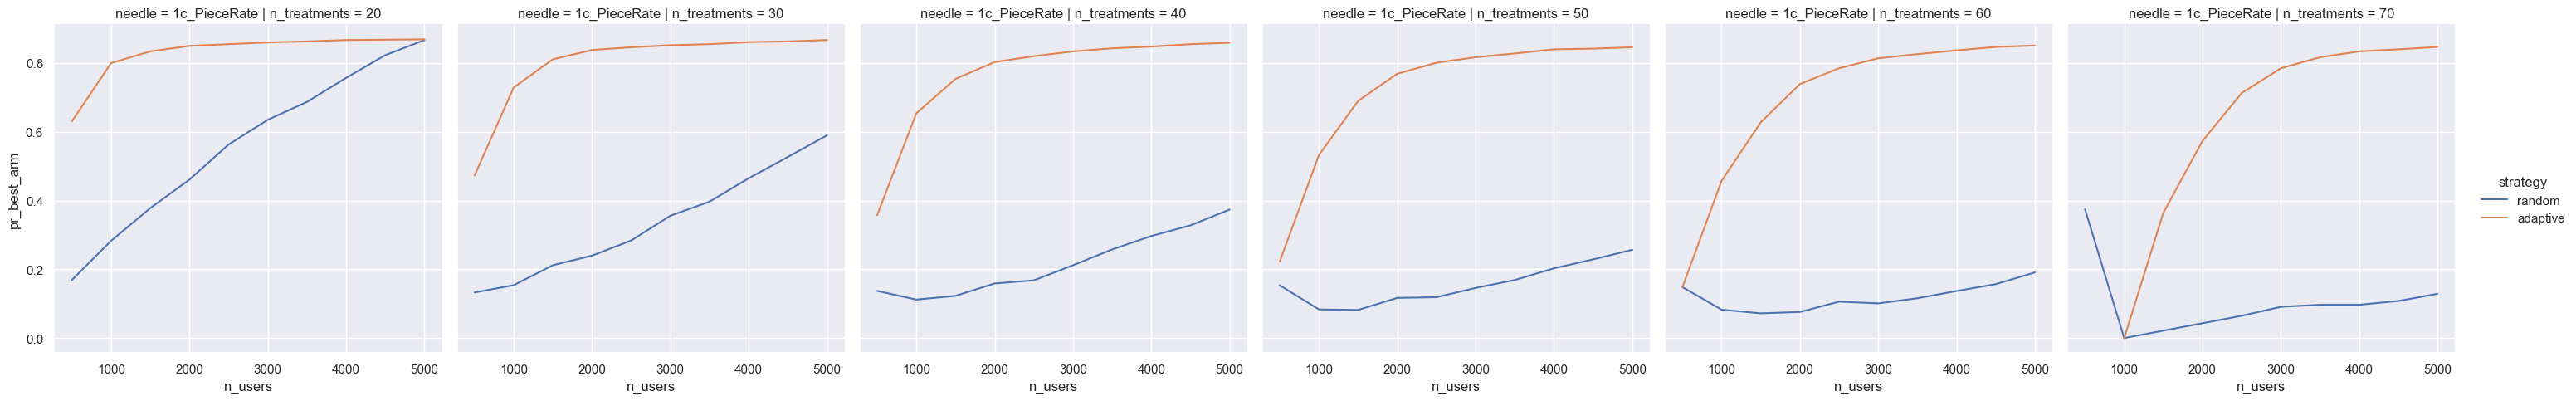

In [35]:
sns.relplot(
    data=df,
    x="n_users",
    y="pr_best_arm",
    hue="strategy",
    col="n_treatments",
    row="needle",
    kind="line",
    ci=None
)
plt.savefig(os.path.join(PLOT_DIR, "pr_best_arm.png"))
plt.show()

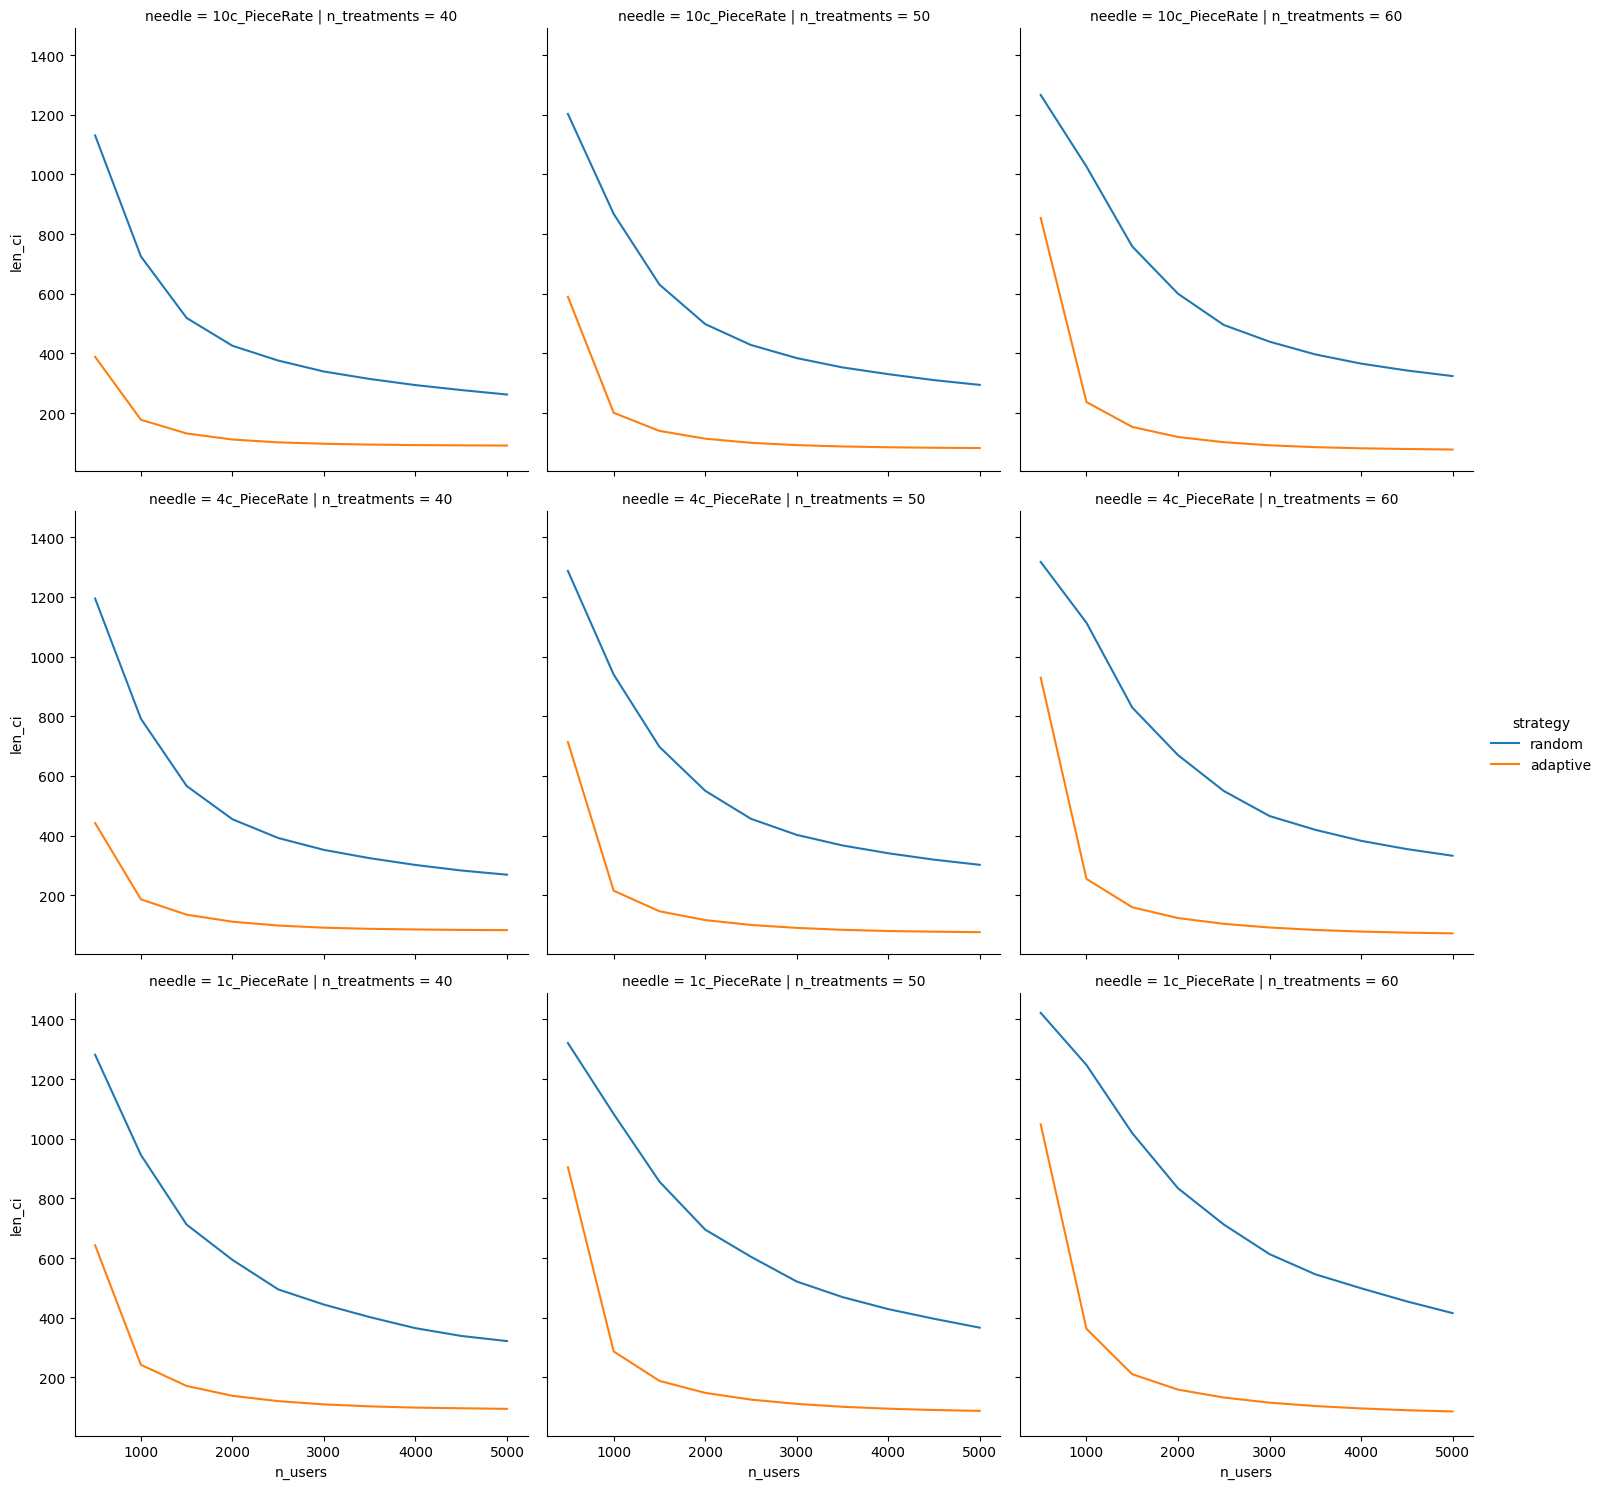

In [18]:
sns.relplot(
    data=df[df.n_treatments != 70],
    x="n_users",
    y="len_ci",
    hue="strategy",
    col="n_treatments",
    row="needle",
    kind="line",
    estimator=lambda x: np.quantile(x, .5),
    ci=None
)
plt.savefig(os.path.join(PLOT_DIR, "len_ci.png"))
plt.show()